<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/AbdelMahm/FSR/blob/master/IDDLO-29-20/Notebooks/Linear_Regression.ipynb"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" />Run in Google Colab</a>
  </td>
</table>

# Linear Regression

## imports

In [22]:
import sys
import sklearn
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import urllib.request
from sklearn import preprocessing
from sklearn import pipeline

## Download data

In [23]:
import numpy as np
import pandas as pd 
from sklearn.linear_model import LinearRegression
from scipy.stats import lognorm

def cVirale(day):
    s = 0.5
    mean, var, skew, kurt = lognorm.stats(s, moments='mvsk')
    x = np.linspace(lognorm.ppf(0, s),lognorm.ppf(0.99, s), 100)
    days = np.linspace(-5, 15, len(x))

    lr = LinearRegression()
    lr.fit(days.reshape(-1, 1), x)
    return(float(lognorm.pdf(lr.predict([[day]]), s)/max(lognorm.pdf(x, s))))

c = []
for day in np.arange(-5, 20):
    c.append(cVirale(day))

print(c)
    

[0.0, 0.006677901547061112, 0.20554832549664084, 0.6260173091451563, 0.9258817062987911, 0.9985862736692374, 0.9162189346640229, 0.7679591151685397, 0.610329964595226, 0.4697292197249814, 0.3545709672216219, 0.2646046793977712, 0.19623651064484002, 0.1451258561791916, 0.1072760405678079, 0.07938597387327306, 0.05887643571110518, 0.04379456311642677, 0.03268883837071063, 0.02449203116429482, 0.018424189041023917, 0.013916949826873196, 0.01055644859237273, 0.00804109995832768, 0.006150748821714521]


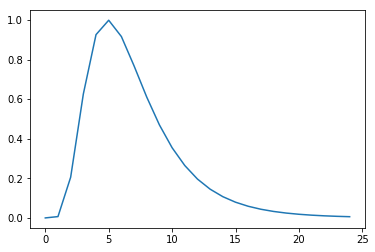

In [24]:
plt.plot(c)

#save_fig('best_fit_model_plot')
plt.show()

In [25]:
def getNewInfected(infected):
    totalInfected=[0]+infected
    output=[]
    for i in range(len(totalInfected)-1):
        output+=[totalInfected[i+1]-totalInfected[i]]
    return(output)

In [32]:
infected = getNewInfected([1, 3, 5, 6, 10])

In [35]:
print(infected)

[1, 2, 2, 1, 4]


In [33]:
idCovidP0=list(np.random.choice(range(100),np.sum(np.array(infected)),replace=False))   

In [43]:
print(idCovidP0)

[55, 51, 27, 83, 22, 1, 91, 28, 69, 88]


[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

In [ ]:
import urllib.request
data_path = os.path.join("datasets", "")
download_path = "https://raw.githubusercontent.com/AbdelMahm/FSR/master/IDDLO-29-20/Notebooks/datasets/"
os.makedirs(data_path, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = download_path + filename
    urllib.request.urlretrieve(url, data_path + filename)

In [ ]:
oecd_bli = pd.read_csv(data_path + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(data_path + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

In [ ]:
#take a look to the first file
oecd_bli.head()

## Preprocessing

In [ ]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head()

In [ ]:
#take a look to the first file
gdp_per_capita.head()

In [ ]:
# Preprocessing of the data  (iterested with column "2015" which is the "GDP per capita")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head()

In [ ]:
#merge data  
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                              left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)

data = full_country_stats[["GDP per capita", 'Life satisfaction']]


## Linear Regression Model

In [ ]:
data.head()

### Select some features

In [ ]:
#select the features you are interested in
X = np.c_[data["GDP per capita"]]
y = np.c_[data["Life satisfaction"]]
np.shape(X)

### Visualization

In [ ]:
# Visualize the sample data
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])

plt.xlabel("GDP per capita (USD)")

plt.show()
#

### Training

In [ ]:
lrModel = sklearn.linear_model.LinearRegression()

# Train the model
lrModel.fit(X, y)

#model parameters
w0, w1 = lrModel.intercept_[0], lrModel.coef_[0][0]

#R2 (when R2=1, all data is fit -> the Loss(w)=0)
print(lrModel.score(X, y))

In [ ]:
#plot
data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 60000, 0, 10])
x=np.linspace(0, 60000, 1000)
plt.plot(x, w0 + w1*x, "b")

#save_fig('best_fit_model_plot')
plt.show()

### Prediction

In [ ]:
# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(lrModel.predict(X_new)) # outputs [[ 5.96242338]]

## Add polynomial features

In [ ]:
poly = preprocessing.PolynomialFeatures(degree=5, include_bias=False)
scaler = preprocessing.StandardScaler()

pipelineLRModel = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lrModel)])
np.shape(X)
np.shape(y)
pipelineLRModel.fit(X, y)

In [ ]:
data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

curve = pipelineLRModel.predict(X)
plt.plot(X, curve)
plt.xlabel("GDP per capita (USD)")
plt.show()


In [ ]:
#R2
print(pipelineLRModel.score(X, y))

### Regularization (Ridge)

In [ ]:
lrModelRidge = sklearn.linear_model.Ridge(alpha=10**9.5) # alpha == lambda notation in the course
Xsample = np.c_[data["GDP per capita"]]
ysample = np.c_[data["Life satisfaction"]]
lrModelRidge.fit(Xsample, ysample)
w0ridge, w1ridge = lrModelRidge.intercept_[0], lrModelRidge.coef_[0][0]

In [ ]:
f = plt.figure(figsize=(8,3))

plt.xlabel("GDP per capita")
plt.ylabel('Life satisfaction')

plt.plot(list(data["GDP per capita"]), list(data["Life satisfaction"]), "bo")

x = np.linspace(0, 110000, 1000)
plt.plot(x, w0 + w1*x, "b:", label="Linear model on sample data")
plt.plot(x, w0ridge + w1ridge * x, "b", label="Regularized linear model on sample data")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])
plt.xlabel("GDP per capita (USD)")

plt.show()

In [ ]:
#R2
print(lrModelRidge.score(X, y))

## Exercise

### 1- try LASSO regularization
### 2- try on different data
### 3- try with more features
### 4- tune the regularization hyper-parameter alpha (lambda in the course)